In [11]:
!pip install kaggle


In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Data link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [14]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset
!unzip -o sms-spam-collection-dataset.zip



Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
import pandas as pd

# Specify encoding
df = pd.read_csv('spam.csv', encoding='latin-1')

# Keep only the useful columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data cleaning

In [17]:
df.shape

(5572, 2)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [19]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the CSV with correct encoding
df = pd.read_csv('spam.csv', encoding='latin-1')

# Step 2: Keep only the relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Step 3: Encode labels: 'ham' → 0, 'spam' → 1
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Step 4: Check the cleaned dataframe
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (5572, 2)


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# rename the columns
df.rename(columns = {'v1': 'target','v2':'text'},inplace = True)
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df['target'] = le.fit_transform(df['label'])
df.head()


,label,message,target
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0


In [24]:
df.head()

,label,message,target
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0


In [25]:
# check for missing values
df.isna().sum()

,0
label,0
message,0
target,0


In [26]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [27]:
# remove duplicates
df = df.drop_duplicates(keep = 'first')

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
df.shape

(5169, 3)

## EDA

In [30]:
df.head()

,label,message,target
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0


In [31]:
df['target'].value_counts()

,count
target,
0,4516
1,653


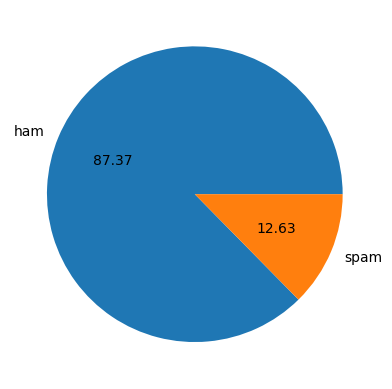

In [32]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct= "%0.2f")
plt.show()

#### Data is imbalanced

In [33]:
!pip install nltk

In [34]:
import nltk

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
df['num_characters'] = df['message'].apply(len)
df.head()



,label,message,target,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",0,111
1,0,Ok lar... Joking wif u oni...,0,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,0,U dun say so early hor... U c already then say...,0,49
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61


In [37]:
import nltk

# Download both 'punkt' and 'punkt_tab' to be safe
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [38]:
from nltk.tokenize import word_tokenize, sent_tokenize

# Number of words
df['num_words'] = df['message'].apply(lambda x: len(word_tokenize(x)))

# Number of sentences
df['num_sentences'] = df['message'].apply(lambda x: len(sent_tokenize(x)))

df.head()


,label,message,target,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,0,Ok lar... Joking wif u oni...,0,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,0,U dun say so early hor... U c already then say...,0,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [39]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

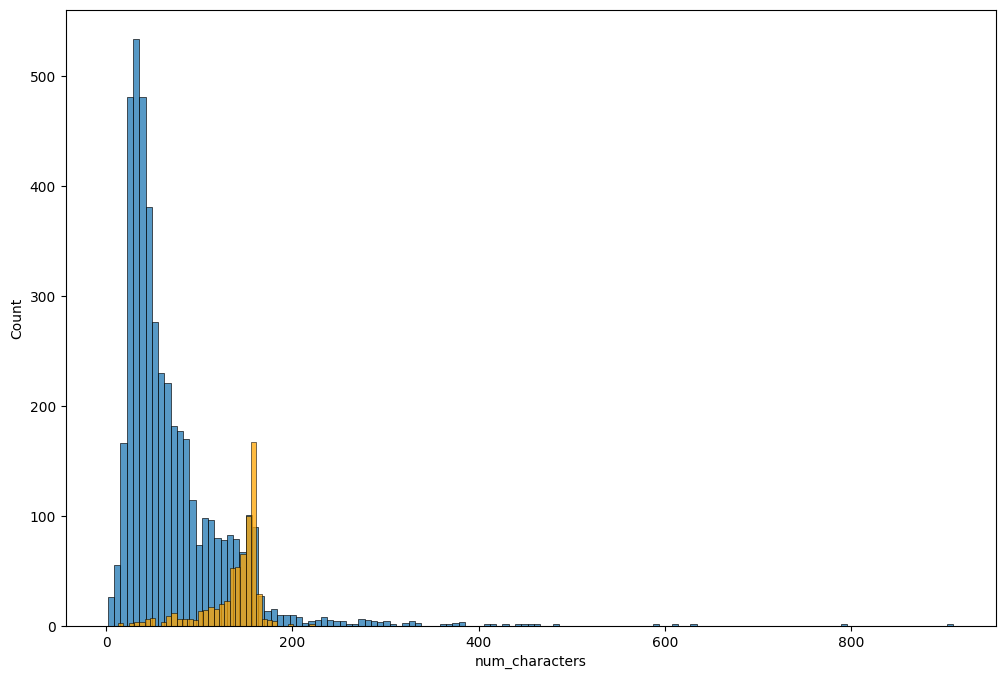

In [42]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'orange')

<Axes: xlabel='num_words', ylabel='Count'>

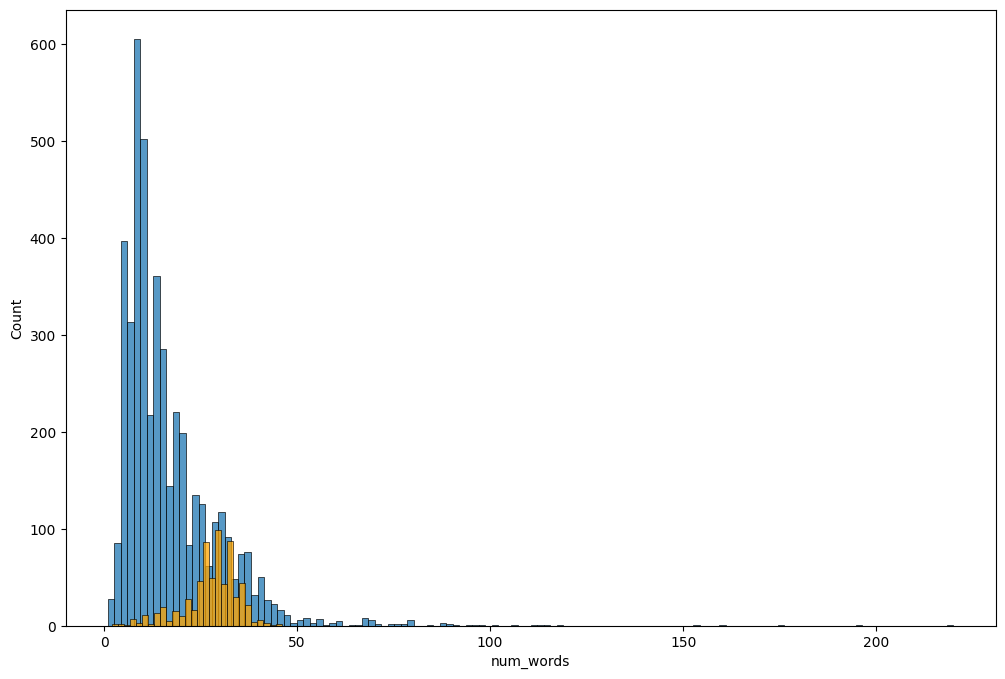

In [43]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'orange')

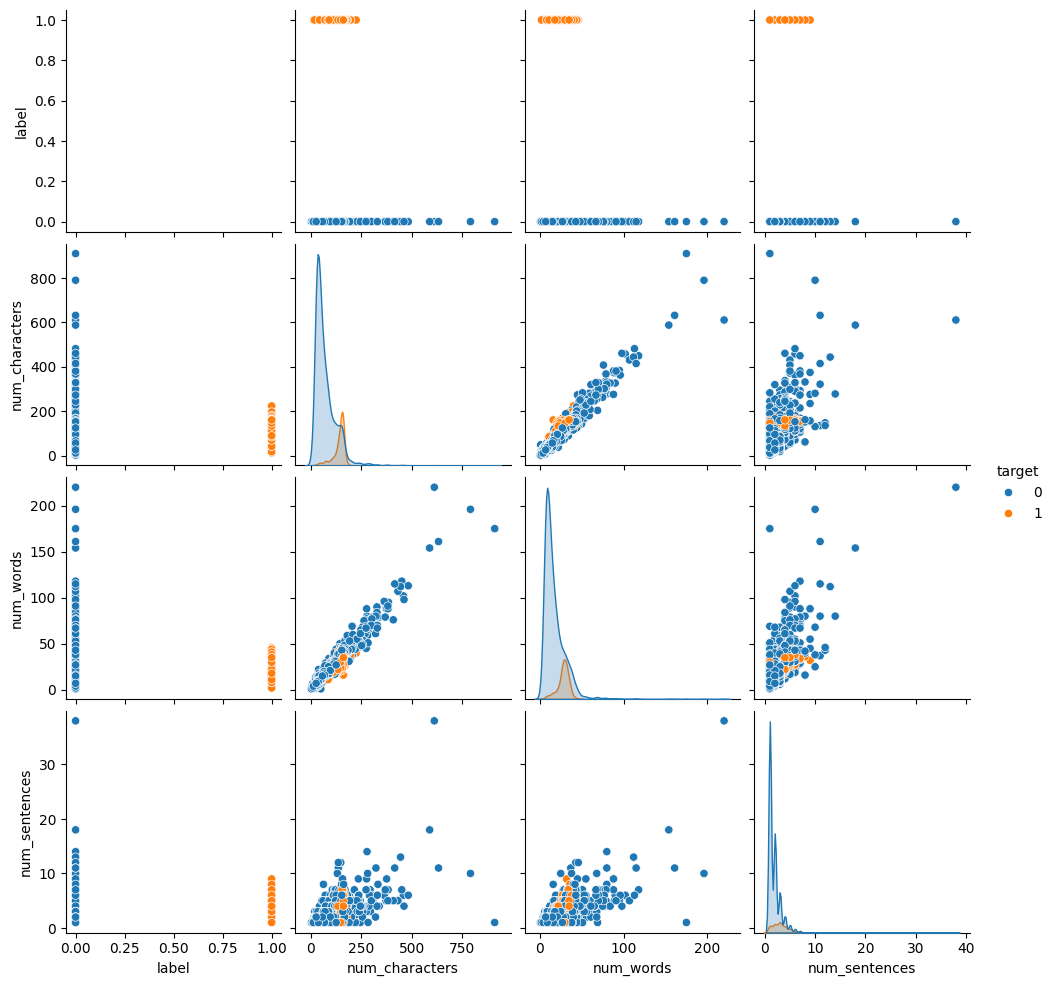

In [44]:
sns.pairplot(df,hue = 'target')

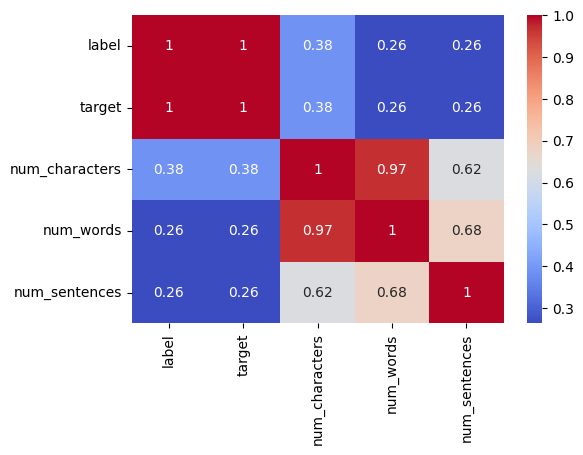

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation and plot
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


## Data Preprocessing
#### * Lower case
#### * Tokenization
#### * Removing special characters
#### * Removing stopwords and punctuation
#### * Stemming

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [48]:
ps = PorterStemmer()
ps.stem('danced')

'danc'

In [49]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [50]:
transform_text(
'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [51]:
df['message'][0]


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [52]:
df['transformed_text'] = df['message'].apply(transform_text)
df.head()

,label,message,target,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [53]:
!pip install wordcloud

In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [55]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

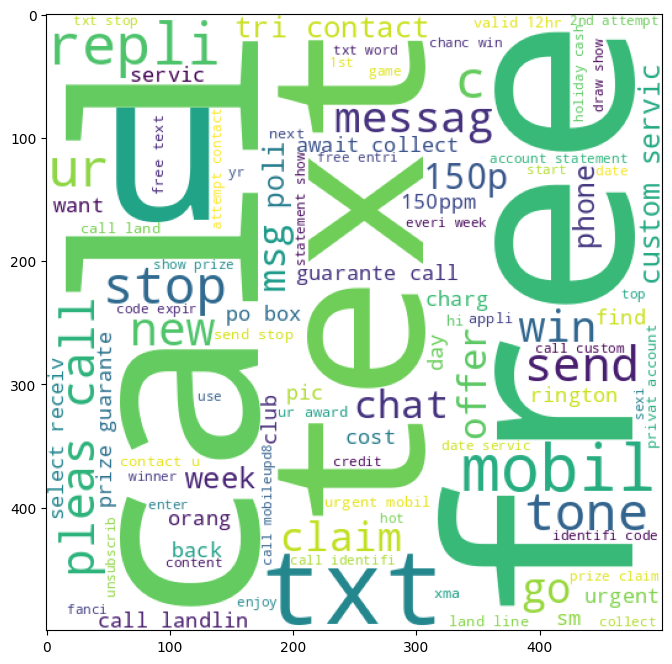

In [56]:
plt.figure(figsize = (15,8))
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

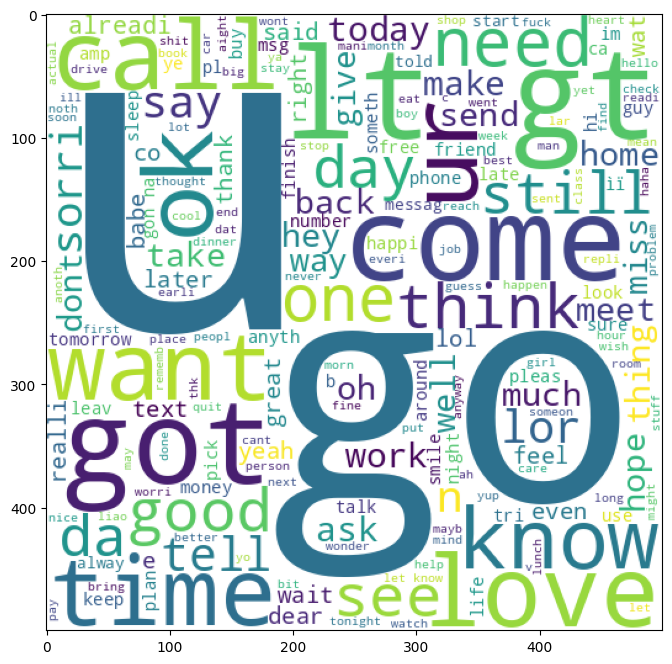

In [58]:
plt.figure(figsize = (15,8))
plt.imshow(ham_wc)

In [59]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [60]:
len(spam_corpus)

9939

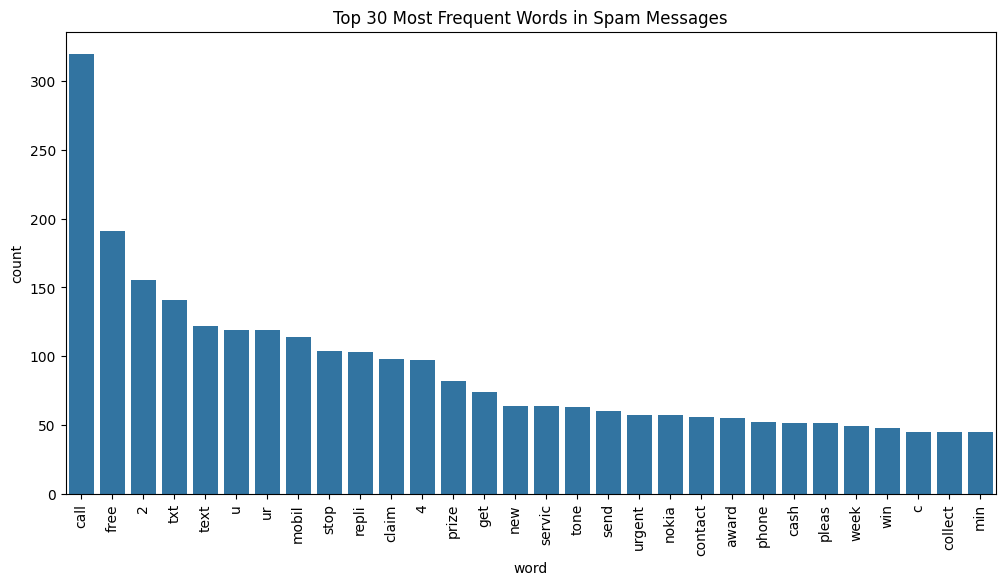

In [61]:
from collections import Counter


# Suppose spam_corpus is a list of all words in spam messages
spam_word_counts = Counter(spam_corpus)
top_30 = pd.DataFrame(spam_word_counts.most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=top_30)
plt.xticks(rotation=90)
plt.title("Top 30 Most Frequent Words in Spam Messages")
plt.show()


In [62]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
len(ham_corpus)

35404

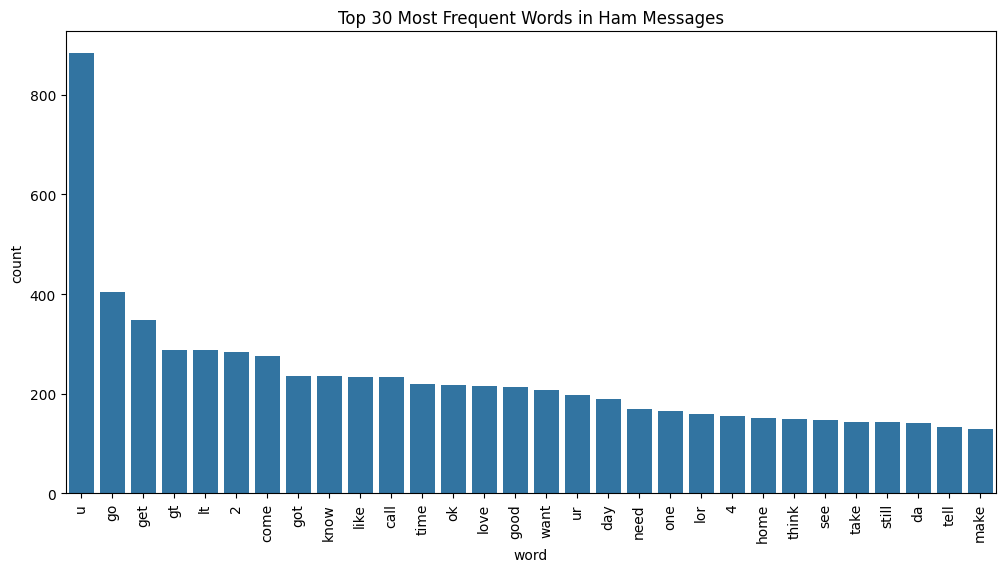

In [64]:
from collections import Counter


# Suppose ham_corpus is a list of all words in ham messages
ham_word_counts = Counter(ham_corpus)
top_30_ham = pd.DataFrame(ham_word_counts.most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=top_30_ham)
plt.xticks(rotation=90)
plt.title("Top 30 Most Frequent Words in Ham Messages")
plt.show()


## Model Building

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [66]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
X.shape

(5169, 6708)

In [68]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4135, 6708)
(1034, 6708)
(4135,)
(1034,)


In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [74]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [75]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [76]:
# choosen tfidf-->MNB because precision is 1

### Lets see some other algorithms and compare their performance

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
svc = SVC(kernel = 'sigmoid',gamma = 0.1)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators= 50, random_state= 2)

In [79]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy , precision

In [81]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9110251450676983, 0.9791666666666666)

In [82]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [83]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision': precision_scores}).sort_values('Precision',ascending = False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.911025,0.979167
10,xgb,0.974855,0.951613
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
6,AdaBoost,0.924565,0.840909


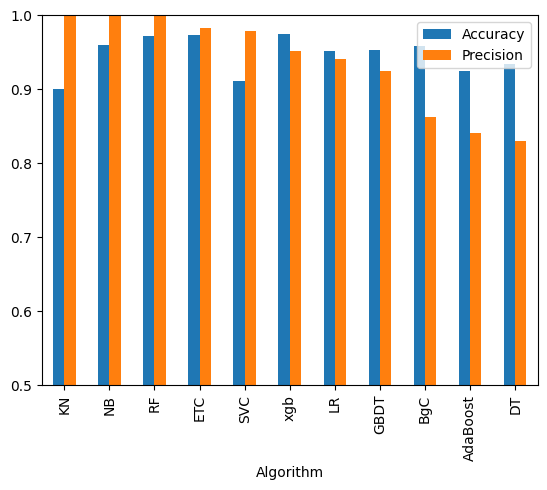

In [84]:
performance_df.plot(x = 'Algorithm', y = ['Accuracy','Precision'],kind = 'bar')
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

### lets limit max_features in tfidf to 3000

In [85]:
tfidf = TfidfVectorizer(max_features= 3000)

In [86]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [87]:
X.shape

(5169, 3000)

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4135, 3000)
(1034, 3000)
(4135,)
(1034,)


In [90]:
accuracy_scores_3000 = []
precision_scores_3000 = []

for name, clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores_3000.append(current_accuracy)
    precision_scores_3000.append(current_precision)

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_3000':accuracy_scores_3000,'Precision_3000': precision_scores_3000}).sort_values('Precision_3000',ascending = False)
temp_df

,Algorithm,Accuracy_3000,Precision_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
8,ETC,0.974855,0.974576
0,SVC,0.926499,0.969697
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [92]:
performance_df.merge(temp_df, on = 'Algorithm',)

,Algorithm,Accuracy,Precision,Accuracy_3000,Precision_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.973888,0.982609
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.911025,0.979167,0.926499,0.969697
5,xgb,0.974855,0.951613,0.968085,0.948718
6,LR,0.951644,0.940000,0.955513,0.960000
7,GBDT,0.952611,0.923810,0.950677,0.930693
8,BgC,0.958414,0.862595,0.958414,0.868217
9,AdaBoost,0.924565,0.840909,0.921663,0.820225


## So by seeing above data we can choose Multionomial Naive bayes

### lets see some predictions

In [93]:
def predict(text):
    transformed_text = transform_text(text)
    x = tfidf.transform([transformed_text])
    pred = mnb.predict(x)[0]
    if(pred == 1):
        return "spam"
    else:
        return "not_spam"

In [94]:
predict("Hi How are you should we go for movie today evening")

'not_spam'

In [95]:
predict("Free entry in 2 a wkly comp to win FA Cup fina...")

'spam'

In [96]:
predict("SIX chances to win CASH! From 100 to 20,000 po...")

'spam'

In [97]:
predict("Even my brother is not like to speak with me. ...")

'not_spam'

In [98]:
predict("The guy did some bitching but I acted like i'd...")

'not_spam'

In [99]:
predict("congratulations you have won cash prize of 1000$ enter otp on this number")

'spam'

In [100]:
predict("how are you")

'not_spam'